In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequentialuential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [3]:
from keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28) # 1 - coor channel as grayscale is used, in other case 3 channels, 28x28 pixels
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255 #transform to number between 0 and 1, normalize
test_images /= 255

In [4]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10) #one-hot encoding
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


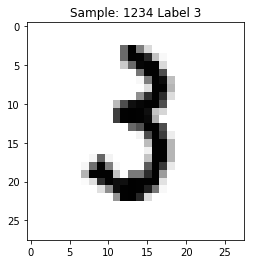

In [5]:
import matplotlib.pyplot as plt

def display_sample(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    image = train_images[num].reshape([28, 28])
    plt.title('Sample: %d Label %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

display_sample(1234)

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension to pass into final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
223s - loss: 0.1912 - acc: 0.9423 - val_loss: 0.0446 - val_acc: 0.9855
Epoch 2/10
232s - loss: 0.0814 - acc: 0.9758 - val_loss: 0.0326 - val_acc: 0.9894
Epoch 3/10
234s - loss: 0.0603 - acc: 0.9818 - val_loss: 0.0298 - val_acc: 0.9899
Epoch 4/10
242s - loss: 0.0500 - acc: 0.9844 - val_loss: 0.0286 - val_acc: 0.9906
Epoch 5/10
244s - loss: 0.0405 - acc: 0.9867 - val_loss: 0.0287 - val_acc: 0.9916
Epoch 6/10
248s - loss: 0.0364 - acc: 0.9886 - val_loss: 0.0314 - val_acc: 0.9907
Epoch 7/10
248s - loss: 0.0314 - acc: 0.9902 - val_loss: 0.0310 - val_acc: 0.9917
Epoch 8/10
247s - loss: 0.0304 - acc: 0.9904 - val_loss: 0.0303 - val_acc: 0.9915
Epoch 9/10
247s - loss: 0.0260 - acc: 0.9917 - val_loss: 0.0301 - val_acc: 0.9926
Epoch 10/10
243s - loss: 0.0250 - acc: 0.9922 - val_loss: 0.0281 - val_acc: 0.9926


In [12]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("test loss:", score[0])
print("test accuracy:", score[1])

test loss: 0.0280623687506
test accuracy: 0.9926
